In [65]:
with open("data_inputs/day06_input.txt") as file:
    map = file.read().splitlines()

map

['.........#..................#.......#...............#..................................#.....................................#....',
 '..#....................................#...#......#....................#..........................................................',
 '..........................................................#..#.#................#............#....................#...............',
 '...........................................................#......................................................#...............',
 '............................#..........#................................................#............#.#....................#.....',
 '...........#............................#............................................#...........................................#',
 '......#..................#..#...........#.......................#..........#.....................#...........#...#......#.....#...',
 '...#.................................................

In [54]:
guards = {
    "<": {
        "dir": (0, -1),
        "r_guard": "^",
    },
    "^": {
        "dir": (-1, 0),
        "r_guard": ">",
    },
    ">": {
        "dir": (0, 1),
        "r_guard": "v",
    },
    "v": {
        "dir": (1, 0),
        "r_guard": "<",
    },
}

start_guard = None
start_pos = None

# start pos
for i in range(len(map)):
    for _guard in guards.keys():
        if _guard in map[i]:
            start_guard = _guard
            start_pos = (i, map[i].index(guard))
            break
    if start_guard:
        break

pos = start_pos
guard = start_guard
print(f"Start pos: {pos} - Start guard: {start_guard}")
visited_pos = [start_pos]
is_out = False
it = 0

while it < 100000:

    it += 1
    new_pos = (pos[0] + guards[guard]["dir"][0], pos[1] + guards[guard]["dir"][1])
    if new_pos[0] < 0 or new_pos[0] >= len(map) or new_pos[1] < 0 or new_pos[1] >= len(map[0]):
        is_out = True
        print(f"it: {it} - out: {new_pos}")
        break
    elif map[new_pos[0]][new_pos[1]] == "#":
        guard = guards[guard]["r_guard"]
    else:
        pos = new_pos
        if pos not in visited_pos:
            visited_pos.append(pos)
        

print("Result 1: ", len(visited_pos)) 

Start pos: (95, 68) - Start guard: ^
it: 5344 - out: (-1, 24)
Result 1:  4776


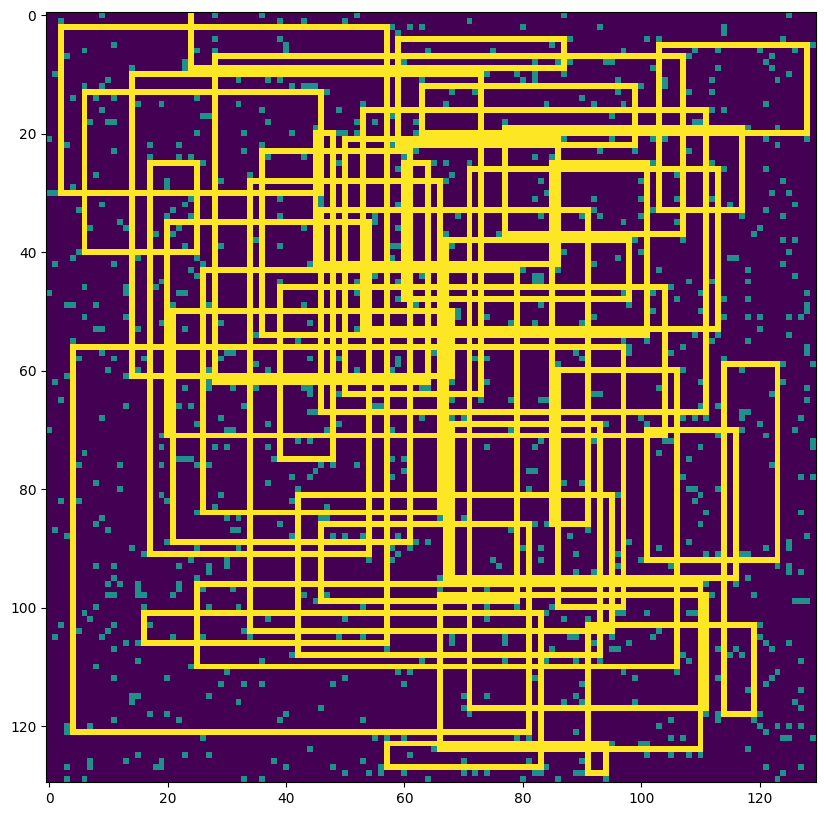

In [55]:
import numpy as np
import matplotlib.pyplot as plt

np_map = np.zeros((len(map), len(map[0])))
for i in range(len(map)):
    for j in range(len(map[0])):
        if map[i][j] == "#":
            np_map[i, j] = 1
        elif (i, j) in visited_pos:
            np_map[i, j] = 2

plt.figure(figsize = (10, 10))
plt.imshow(np_map, interpolation='nearest')
plt.show()

In [ ]:
loop_obs_pos = 0
pos_guard = lambda pos, guard: f"{pos[0]}_{pos[1]}_{guard}"

for i, obs_pos in enumerate(visited_pos[1:]):
    print(f"Loop {i} / {len(visited_pos)} -- ({loop_obs_pos})") if i % 100 == 0 else None
    is_out = False
    it = 0
    pos = start_pos
    guard = start_guard
    seen_pos_guards = []

    map2 = map.copy()
    row = list(map2[obs_pos[0]])
    row[obs_pos[1]] = "#"
    map2[obs_pos[0]] = "".join(row)

    while it < 1000000:
        it += 1
        new_pos = (pos[0] + guards[guard]["dir"][0], pos[1] + guards[guard]["dir"][1])
        if new_pos[0] < 0 or new_pos[0] >= len(map) or new_pos[1] < 0 or new_pos[1] >= len(map[0]):
            is_out = True
            break
        elif pos_guard(pos, guard) in seen_pos_guards:
            loop_obs_pos += 1
            break
        elif map2[new_pos[0]][new_pos[1]] == "#":
            guard = guards[guard]["r_guard"]
        else:
            seen_pos_guards.append(pos_guard(pos, guard))
            pos = new_pos
            
print("Result 2: ", loop_obs_pos)   # 2

Loop 0 / 4776 -- (0)
Loop 100 / 4776 -- (4)
Loop 200 / 4776 -- (11)
Loop 300 / 4776 -- (31)
Loop 400 / 4776 -- (45)
Loop 500 / 4776 -- (60)
Loop 600 / 4776 -- (78)
Loop 700 / 4776 -- (103)
Loop 800 / 4776 -- (135)
Loop 900 / 4776 -- (137)
Loop 1000 / 4776 -- (153)
Loop 1100 / 4776 -- (187)
Loop 1200 / 4776 -- (219)
Loop 1300 / 4776 -- (238)
Loop 1400 / 4776 -- (267)
Loop 1500 / 4776 -- (304)
Loop 1600 / 4776 -- (342)
Loop 1700 / 4776 -- (355)
Loop 1800 / 4776 -- (373)
Loop 1900 / 4776 -- (393)
Loop 2000 / 4776 -- (415)
Loop 2100 / 4776 -- (462)
Loop 2200 / 4776 -- (494)
Loop 2300 / 4776 -- (525)
Loop 2400 / 4776 -- (556)
Loop 2500 / 4776 -- (591)
Loop 2600 / 4776 -- (607)
Loop 2700 / 4776 -- (650)
Loop 2800 / 4776 -- (691)
Loop 2900 / 4776 -- (730)
Loop 3000 / 4776 -- (783)
Loop 3100 / 4776 -- (831)
Loop 3200 / 4776 -- (886)
Loop 3300 / 4776 -- (926)
Loop 3400 / 4776 -- (957)
Loop 3500 / 4776 -- (986)
Loop 3600 / 4776 -- (1035)
Loop 3700 / 4776 -- (1082)
Loop 3800 / 4776 -- (1111)
Loop